## 가중평균반사도 예측모형

- 이미지 픽셀 값 -> 두께를 predict 하는 모델 구축

### 데이터 전처리 부분

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [242]:
df = pd.read_csv("Solar.csv",header=0).iloc[:,:5]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   R          32 non-null     int64  
 1   G          32 non-null     int64  
 2   B          32 non-null     int64  
 3   R_I        32 non-null     object 
 4   Thickness  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [244]:
df.R_I = df.R_I.str.replace(",",".").astype(float)

In [246]:
seed = 42

In [247]:
from sklearn.model_selection import train_test_split

In [248]:
train, test = train_test_split(df, test_size=0.3, random_state=seed)
X_train, y_train = train.iloc[:,:4], train.iloc[:,4]
X_test, y_test = test.iloc[:,:4], test.iloc[:,4]

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


In [249]:
"""from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)"""

'from sklearn.preprocessing import MinMaxScaler\n\n# Create a MinMaxScaler object\nscaler = MinMaxScaler()\n\n# Fit the scaler to the data and transform it\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)'

### Linear Regression Test

In [250]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.7438383177032218

### NN Test

In [251]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch

In [252]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 100)
        self.fc3 = nn.Linear(100, 250)
        self.fc4 = nn.Linear(250, 100)
        self.fc5 = nn.Linear(100, 10)
        self.fc6 = nn.Linear(10, 1)
        

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x= self.fc6(x)
        return x
    
net = Net()

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train.values).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test.values).float()

for epoch in range(10000):  # loop over the dataset multiple times
    y_pred_train = net.forward(X_train)
    loss = criterion(y_pred_train, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
        
with torch.no_grad():
    y_pred = net.forward(X_test)
    y_pred = y_pred.numpy()
    print('Test loss: {}'.format(criterion(torch.from_numpy(y_pred), y_test).item()))

c:\Users\se99a\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([22])) that is different to the input size (torch.Size([22, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: train loss: 8287.787109375
Epoch 100: train loss: 392.718505859375
Epoch 200: train loss: 243.00917053222656
Epoch 300: train loss: 229.50003051757812
Epoch 400: train loss: 228.53671264648438
Epoch 500: train loss: 227.95413208007812
Epoch 600: train loss: 227.4004364013672
Epoch 700: train loss: 226.93955993652344
Epoch 800: train loss: 226.55088806152344
Epoch 900: train loss: 226.231201171875
Epoch 1000: train loss: 227.8540496826172
Epoch 1100: train loss: 225.6596221923828
Epoch 1200: train loss: 226.54501342773438
Epoch 1300: train loss: 225.0962371826172
Epoch 1400: train loss: 224.86898803710938
Epoch 1500: train loss: 224.5968475341797
Epoch 1600: train loss: 224.3914337158203
Epoch 1700: train loss: 224.23443603515625
Epoch 1800: train loss: 224.0923309326172
Epoch 1900: train loss: 223.9839324951172
Epoch 2000: train loss: 223.97450256347656
Epoch 2100: train loss: 223.90000915527344
Epoch 2200: train loss: 223.95603942871094
Epoch 2300: train loss: 223.90744018554

c:\Users\se99a\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


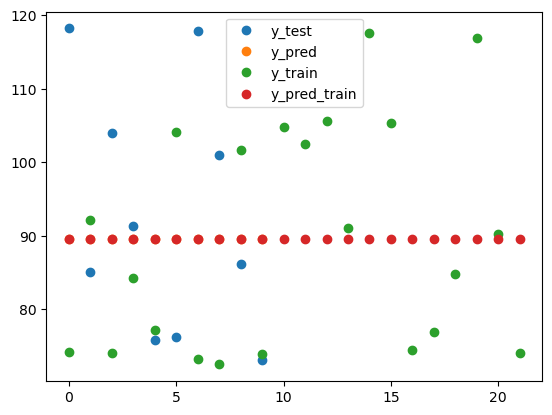

In [253]:
plt.plot(y_test, 'o')
plt.plot(y_pred, 'o')
plt.plot(y_train, 'o')
plt.plot(y_pred_train.detach().numpy(), 'o')
plt.legend(['y_test', 'y_pred', 'y_train', 'y_pred_train'])

In [254]:
%pip install tpot

### AutoML TEST

In [255]:
train, test = train_test_split(df, test_size=0.3, random_state=seed)
X_train, y_train = train.iloc[:,:4], train.iloc[:,4]
X_test, y_test = test.iloc[:,:4], test.iloc[:,4]

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [256]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

# Evaluate the model on the test set
mse = tpot.score(X_test, y_test)
print('Test set mean squared error: %.3f' % mse)

# Export the best pipeline as Python code
tpot.export('tpot_best_pipeline.py')

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -40.47613538832197

Generation 2 - Current best internal CV score: -9.828947101526628

Generation 3 - Current best internal CV score: -8.673579471970266

Generation 4 - Current best internal CV score: -8.673579471970266

Generation 5 - Current best internal CV score: -8.673579471970266

Best pipeline: AdaBoostRegressor(PCA(input_matrix, iterated_power=5, svd_solver=randomized), learning_rate=0.5, loss=exponential, n_estimators=100)
Test set mean squared error: -2.143


c:\Users\se99a\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py:794: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [257]:
y_pred = tpot.predict(X_test)
y_pred_train = tpot.predict(X_train)

In [258]:
y_pred

array([117.25      ,  84.55      , 103.27142857,  91.3       ,
        77.2       ,  76.9       , 117.04      , 102.31111111,
        86.44444444,  76.975     ])

In [259]:
idx = list(i for i in range(len(y_pred)))

In [260]:
y_test.index = idx
y_pred = pd.DataFrame(y_pred)[0]

In [261]:
y_pred

0    117.250000
1     84.550000
2    103.271429
3     91.300000
4     77.200000
5     76.900000
6    117.040000
7    102.311111
8     86.444444
9     76.975000
Name: 0, dtype: float64

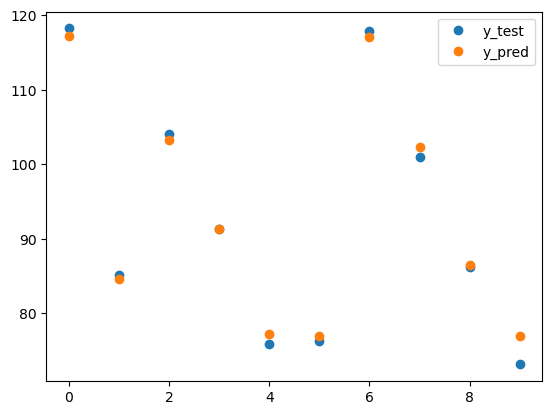

In [262]:
plt.plot(y_test, 'o')
plt.plot(y_pred, 'o')
#plt.plot(y_train, 'o')
#plt.plot(y_pred_train, 'o')
plt.legend(['y_test', 'y_pred', 'y_train', 'y_pred_train'])

AutoML만 사용하였을 때, 성능 매우 우수함